In [1]:
# Connect to my google drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
# download yolo
!git clone https://github.com/ultralytics/yolov5  # clone repo
!pip install -qr yolov5/requirements.txt # install dependencies (ignore errors)
# download my moedels
%cd yolov5/
!bash /content/yolov5/weights/download_weights.sh

Cloning into 'yolov5'...
remote: Enumerating objects: 15, done.
remote: Counting objects: 100% (15/15), done.
remote: Compressing objects: 100% (12/12), done.
remote: Total 3098 (delta 5), reused 7 (delta 3), pack-reused 3083
Receiving objects: 100% (3098/3098), 6.43 MiB | 23.19 MiB/s, done.
Resolving deltas: 100% (2054/2054), done.
     |████████████████████████████████| 276kB 8.9MB/s 
/content/yolov5
100% 14.5M/14.5M [00:00<00:00, 21.0MB/s]

100% 41.9M/41.9M [00:01<00:00, 33.2MB/s]

100% 91.6M/91.6M [00:04<00:00, 22.7MB/s]

100% 170M/170M [00:04<00:00, 38.8MB/s]



In [3]:
# creating folders
%cd ..
!mkdir fromVideo
!mkdir makeVideo

/content


In [4]:
!mkdir curFolder

In [5]:
# get every frame of my video

import cv2
vidcap = cv2.VideoCapture('/content/gdrive/MyDrive/tests/My images/VID_20201125_150849.mp4')
success,image = vidcap.read()
count = 0
while success:
  cv2.imwrite("/content/fromVideo/frame%d.jpg" % count, image)     # save frame as JPEG file      
  success,image = vidcap.read()
  print('Read a new frame: ', success)
  count += 1

Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame:  True
Read a new frame

In [6]:
from tqdm import tqdm
import os
weightPath_coco = "/content/yolov5/yolov5l.pt"
myDir = "/content/fromVideo" 

for img in tqdm(os.listdir(myDir), total=len(os.listdir(myDir))):
    myPath = os.path.join(myDir,img)
    output = !python /content/yolov5/detect.py --source "$myPath" --weights $weightPath_coco --save-txt --conf 0.3

100%|██████████| 90/90 [09:58<00:00,  6.65s/it]


In [7]:
# get img width and height
img = cv2.imread("/content/fromVideo/frame0.jpg")
imgHeight, imgWidth, channels = img.shape

In [8]:
# Crop image function
def crop_image(x_center, y_center, width, height,img):
    # turn to integers
    x_center = int(x_center)
    y_center = int(y_center)
    width = int(width)
    height = int(height)
    # find the topX and topY
    topX = int(x_center - width/2)
    topY = int(y_center - height/2)
    #slice my image
    slicedImg = img[topY:topY + height, topX:topX + width]
    return slicedImg
    

In [88]:
# write the class on image
def write_on_image(img, list_of_pred_classes):
    y = 0
    for pred_class in list_of_pred_classes:
        y = y+30
        cv2.putText(img, pred_class,
	                (int(imgWidth/2 - 10), y), cv2.FONT_HERSHEY_SIMPLEX,
	                1.0, (0, 0, 255), 3)
    return img

In [74]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

def detect_traffic_light_color(img):
    output = img.copy()
    # convert to hsv
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    # Green mask
    lower_green = np.array([40,50,50])
    upper_green = np.array([90,255,255])

    mask_green = cv2.inRange(hsv, lower_green, upper_green)
    mask_green= cv2.medianBlur(mask_green,19)

    # red mask
    lower_red = np.array([0, 50, 100])
    upper_red = np.array([25, 255, 255])

    mask_red = cv2.inRange(hsv, lower_red, upper_red)
    mask_red = cv2.medianBlur(mask_red,19)
    # yellow mask
    lower_yellow = np.array([15,150,150])
    upper_yellow = np.array([35,255,255])
    mask_yellow = cv2.inRange(hsv, lower_yellow, upper_yellow)
    mask_yellow = cv2.medianBlur(mask_yellow,19)

    # hough circle detect
    r_circles = cv2.HoughCircles(mask_red, cv2.HOUGH_GRADIENT, 1, 60,
                                param1=50, param2=10, minRadius=1, maxRadius=20)

    g_circles = cv2.HoughCircles(mask_green, cv2.HOUGH_GRADIENT, 1, 60,
                                param1=50, param2=7, minRadius=10, maxRadius=20)

    y_circles = cv2.HoughCircles(mask_yellow, cv2.HOUGH_GRADIENT, 1, 60,
                                param1=50, param2=5, minRadius=10, maxRadius=20)
    

    value = "no"

    if r_circles is not None:
        r_circles = np.uint16(np.around(r_circles))
        for (x, y ,r) in r_circles[0, :]:
            cv2.circle(output, (x, y), r, (255, 0, 0), 3)
            cv2.circle(output, (x, y), 2, (255, 0, 0), 3)
            
            value = "red"

    if g_circles is not None:
        g_circles = np.uint16(np.around(g_circles))
        for (x, y ,r) in g_circles[0, :]:
            cv2.circle(output, (x, y), r, (255, 0, 0), 3)
            cv2.circle(output, (x, y), 2, (255, 0, 0), 3)
            output=cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
            
            value = "green"

    if y_circles is not None:
        y_circles = np.uint16(np.around(y_circles))
        for (x, y ,r) in y_circles[0, :]:
            cv2.circle(output, (x, y), r, (255, 0, 0), 3)
            cv2.circle(output, (x, y), 2, (255, 0, 0), 3)
            output=cv2.cvtColor(output, cv2.COLOR_BGR2RGB)
            
            
            value = "orange"

    return str(value)

In [92]:
from pathlib import Path

detected_path = "/content/runs/detect"
counter = 0
for exps in tqdm(os.listdir(detected_path), total=len(os.listdir(detected_path))):
    expsPath = os.path.join(detected_path, exps) # /content/runs/detect/exp
    for expsInfo in os.listdir(expsPath):
        
        if expsInfo.endswith(".jpg"):
            test_image_path = os.path.join(expsPath, expsInfo) # /content/runs/detect/exp/frameX.jpg
            test_image = cv2.imread(test_image_path)
            image_for_cutting = cv2.imread(f"/content/fromVideo/{expsInfo}")
            cutLast4 = expsInfo.rsplit(".") # /content/runs/detect/exp/frameX
            # Check if labels exists
            labelsPath = f"{expsPath}/labels/{cutLast4[0]}.txt" # /content/runs/detect/exp/frameX.txt
            my_file = Path(labelsPath)
            if my_file.is_file():
                f = open(labelsPath, "r")
                fileslines = f.read().splitlines()
                
                predicted_class = []
                for line in fileslines:
                    info = line.rsplit(" ")
                    clas = info[0]
                    x_center = int(float(info[1]) * imgWidth)
                    y_center = int(float(info[2]) * imgHeight)

                    mywidth = float(info[3]) * imgWidth
                    myheight = float(info[4]) * imgHeight

                    if clas == "9":
                        

                        # crop image
                        slicedImg = crop_image(x_center,y_center,mywidth,myheight,image_for_cutting)
                        #check if sliced image exists
                        if slicedImg is not None:                           
                            #save image to a current folder
                            cv2.imwrite(f"/content/curFolder/{counter}.jpg", slicedImg)
                            counter = counter + 1
                            #take predicted class
                            predicted_class.append(detect_traffic_light_color(slicedImg))
                # delete wrong predictions of yolo
                predicted_class = [i for i in predicted_class if i != "no"]               
                # write the preddicted classes on image        
                test_image = write_on_image(test_image, predicted_class)
                
            #Save image
            cv2.imwrite(f"/content/makeVideo/{expsInfo}", test_image)

100%|██████████| 90/90 [00:03<00:00, 24.22it/s]


In [90]:
# clear my make video file

directory = "/content/makeVideo"
for img in os.listdir(directory):
    curPath = f"{directory}/{img}"
    !rm $curPath

In [91]:
# clear my make video file

directory = "/content/curFolder"
for img in os.listdir(directory):
    curPath = f"{directory}/{img}"
    !rm $curPath

rm: cannot remove '/content/curFolder/.ipynb_checkpoints': Is a directory


In [94]:
# make my video
fps = 10.0
image_folder = '/content/makeVideo'
video_name = 'trafficLights.mp4'
num_of_images = os.listdir(image_folder)
num_of_images = len(num_of_images)
images = []
for _ in range(0, num_of_images, 1):
    images.append(f"{image_folder}/frame{_}.jpg")


frame = cv2.imread(images[0])
height, width, layers = frame.shape

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
video = cv2.VideoWriter(video_name, fourcc, fps, (width,height))

for image in images:
    video.write(cv2.imread(os.path.join(image_folder, image)))

cv2.destroyAllWindows()
video.release()

red


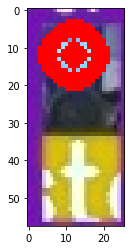

In [70]:
img = cv2.imread("/content/curFolder/0.jpg")
output = img.copy()
# convert to hsv
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
lower_red = np.array([0, 50, 100])
upper_red = np.array([25, 255, 255])

mask_red = cv2.inRange(hsv, lower_red, upper_red)
mask_red = cv2.medianBlur(mask_red,9)
r_circles = cv2.HoughCircles(mask_red, cv2.HOUGH_GRADIENT, 1, 60,
                                param1=50, param2=10, minRadius=1, maxRadius=20)
value = 'no'
if r_circles is not None:
        r_circles = np.uint16(np.around(r_circles))
        for (x, y ,r) in r_circles[0, :]:
            cv2.circle(output, (x, y), r, (255, 0, 0), 3)
            cv2.circle(output, (x, y), 2, (255, 0, 0), 3)
            
            value = "red"
plt.imshow(output)
print(value)